### Loading do Arquivo

In [1]:
! pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

#Mapeamento de doenças (índice - nome)
columns = ["Q00201", "Q03001", "Q060", "Q06306", "Q068", "Q074", "Q079",
           "Q092", "Q11006", "Q11604", "Q120", "Q124", "K045", "V0001"]

df = pd.read_csv("./pns2019.csv", usecols=columns)
print(df.head())

   V0001  K045  Q00201  Q03001  Q060  Q06306  Q068  Q074  Q079  Q092  Q11006  \
0     11   NaN     1.0     2.0   1.0     2.0   2.0   2.0   1.0   1.0     2.0   
1     11   2.0     NaN     NaN   NaN     NaN   NaN   NaN   NaN   NaN     NaN   
2     11   NaN     NaN     NaN   NaN     NaN   NaN   NaN   NaN   NaN     NaN   
3     11   NaN     NaN     NaN   NaN     NaN   NaN   NaN   NaN   NaN     NaN   
4     11   NaN     NaN     NaN   NaN     NaN   NaN   NaN   NaN   NaN     NaN   

   Q11604  Q120  Q124  
0     2.0   2.0   2.0  
1     NaN   NaN   NaN  
2     NaN   NaN   NaN  
3     NaN   NaN   NaN  
4     NaN   NaN   NaN  


### A tabela contém muitos valores nulos
- Analizar onde exatamente estão esses nulos, comportamento, por que.

In [3]:
df.isnull().sum()

V0001          0
K045      253793
Q00201    204990
Q03001    209653
Q060      210845
Q06306    202880
Q068      202880
Q074      202880
Q079      202880
Q092      202880
Q11006    202880
Q11604    202880
Q120      202880
Q124      202880
dtype: int64

In [4]:
# Mapeamento de doenças (índice - nome)
dict_doencas = {"Q00201" : "Pressao Alta", 
                "Q03001" : "Diabetes", 
                "Q060" : "Colesterol Alto", 
                "Q06306": "Coracao", 
                "Q068" : "AVC", 
                "Q074" : "Asma", 
                "Q079" : "Artrite", 
                "Q092" : "Depressao", 
                "Q11006" : "Outra doenca mental", 
                "Q11604" : "Doenca Pulmao",
                "Q120" : "Cancer", 
                "Q124" : "Insuficiencia Renal", 
                "K045" : "Cataratas",
                "V0001" : "Unidade Federativa"}

doencas_list = list(dict_doencas.items())
print(doencas_list)

[('Q00201', 'Pressao Alta'), ('Q03001', 'Diabetes'), ('Q060', 'Colesterol Alto'), ('Q06306', 'Coracao'), ('Q068', 'AVC'), ('Q074', 'Asma'), ('Q079', 'Artrite'), ('Q092', 'Depressao'), ('Q11006', 'Outra doenca mental'), ('Q11604', 'Doenca Pulmao'), ('Q120', 'Cancer'), ('Q124', 'Insuficiencia Renal'), ('K045', 'Cataratas'), ('V0001', 'Unidade Federativa')]


In [5]:
#Constrói um dataframe usando as doenças como índices
df_saida = pd.DataFrame(doencas_list, columns=['Código', 'Doença'])
print(df_saida)

    Código               Doença
0   Q00201         Pressao Alta
1   Q03001             Diabetes
2     Q060      Colesterol Alto
3   Q06306              Coracao
4     Q068                  AVC
5     Q074                 Asma
6     Q079              Artrite
7     Q092            Depressao
8   Q11006  Outra doenca mental
9   Q11604        Doenca Pulmao
10    Q120               Cancer
11    Q124  Insuficiencia Renal
12    K045            Cataratas
13   V0001   Unidade Federativa


In [6]:
def calculate_frequency(df, columns) -> list[int]:
    #Lista de frequência (imutável)
    arr_freq = []
    for item in columns:
        '''
        Contagem de doenças
        Filtra o data frame para quando a doença for 1: 
            df[df[item] == 1]
        Conta o número de linhas:
            len()
        Adiciona um dicionário com o nome da coluna e a contagem à lista 'arr_freq':
            arr_freq.append({item: cont})
        '''
        cont = len(df[df[item] == 1])
        arr_freq.append({item: cont})
    return arr_freq

# Verificar se essa definição é necessária
#columns = df.columns()
arr_freq = calculate_frequency(df, columns)

# Índices de max
max = 0
max1 = ''
max2 = ''

# Dicionário ou set de correlações
def calculate_correlations(df, columns, dict_doencas) -> dict:
    arr_corr = {}
    for i, column in enumerate(columns):
        for j in range(len(columns)):
            if j <= i:
                continue
            else:
                max1 = columns[i]
                max2 = columns[j]

                # Contagem de doenças
                max = len(df[(df[columns[i]] == 1) & (df[columns[j]] == 1)])

                # Adiciona ao dicionário de correlações
                tmp = [max1, max2]
                tmp.sort()
                
                #Todo: entender linha abaixo
                arr_corr[f"{dict_doencas[tmp[0]]} - {dict_doencas[tmp[1]]}"] = max
    return arr_corr

# Verificar se essa definição é necessária
#columns = df.columns()
arr_corr = calculate_correlations(df, columns, dict_doencas)

# Constrói um dataframe com as correlações
df_saida = pd.DataFrame(list(arr_corr.items()), columns=['Doença', 'Quantidade'])
df_saida.to_excel("./Saida.xlsx", index = False)
len(arr_corr)

91

### Filtrando as correlações > 1000
- Mostrando quais doenças que ocorrem junto de forma expressiva (>1000 no Brasil como um todo).

In [7]:
df_corr = df_saida.copy() 
'''
Filtrar as correlações com mais de 1000 casos
    df_corr['Quantidade'] > 1000
Ordenar em ordem decrescente
    sort_values(by='Quantidade', ascending=False)
'''
filtered_df = df_corr[df_corr['Quantidade'] > 1000].sort_values(by='Quantidade', ascending=False)
print(filtered_df)

                                   Doença  Quantidade
1          Pressao Alta - Colesterol Alto        7310
11               Cataratas - Pressao Alta        5191
0                 Pressao Alta - Diabetes        4829
5                  Pressao Alta - Artrite        3862
6                Pressao Alta - Depressao        3357
2                  Pressao Alta - Coracao        3015
13             Diabetes - Colesterol Alto        2951
34            Cataratas - Colesterol Alto        2690
28              Colesterol Alto - Artrite        2617
29            Colesterol Alto - Depressao        2379
70        Depressao - Outra doenca mental        2279
68                    Cataratas - Artrite        1992
23                   Cataratas - Diabetes        1985
25              Colesterol Alto - Coracao        1762
63                    Artrite - Depressao        1620
7      Pressao Alta - Outra doenca mental        1526
3                      Pressao Alta - AVC        1371
44                    Catara

## Correlacionando outras Variáveis
- Verificando por Estado.

/tmp/ipykernel_182271/2789527954.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['V0001'] = tmp_df['V0001'].map(estado_dict)


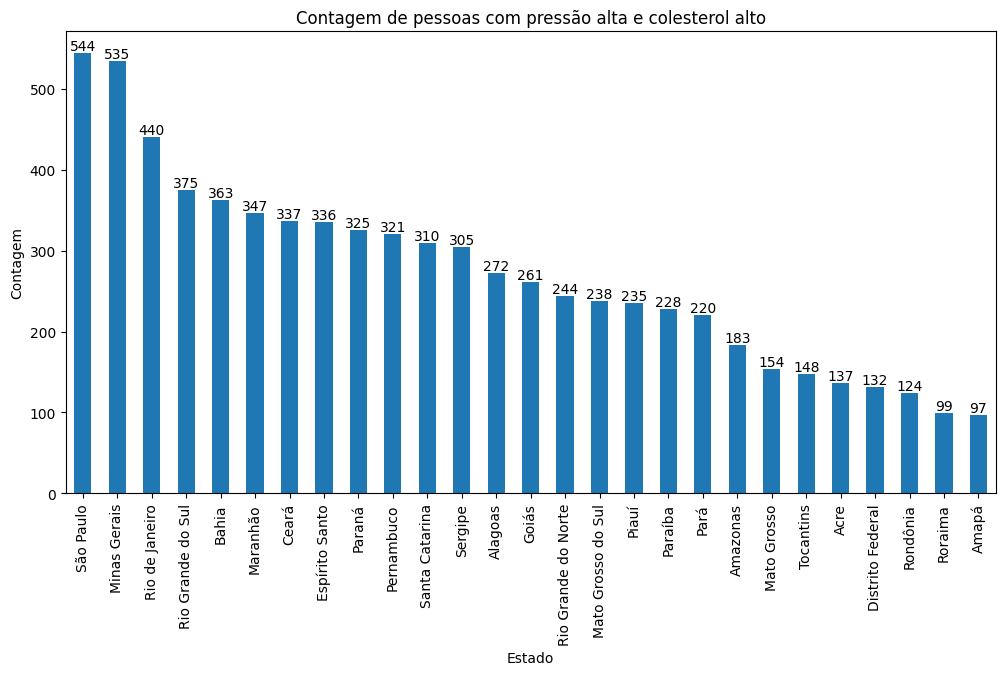

In [8]:
# Mapeamento de doenças (índice - nome)
dict_doencas = {"Q00201" : "Pressao Alta", 
                "Q03001" : "Diabetes", 
                "Q060" : "Colesterol Alto", 
                "Q06306": "Coracao", 
                "Q068" : "AVC", 
                "Q074" : "Asma", 
                "Q079" : "Artrite", 
                "Q092" : "Depressao", 
                "Q11006" : "Outra doenca mental", 
                "Q11604" : "Doenca Pulmao",
                "Q120" : "Cancer", 
                "Q124" : "Insuficiencia Renal", 
                "K045" : "Cataratas",
                "V0001" : "Unidade Federativa"}

tmp_df = df[(df["Q00201"] == 1) & (df["Q060"] == 1)]

estado_dict = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins',
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia',
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo',
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

tmp_df['V0001'] = tmp_df['V0001'].map(estado_dict)
contagem_por_estado = tmp_df['V0001'].value_counts()

plt.figure(figsize=(12, 6))
ax = contagem_por_estado.plot(kind='bar')

plt.title('Contagem de pessoas com pressão alta e colesterol alto')
plt.xlabel('Estado')
plt.ylabel('Contagem')

for i in ax.containers:
    ax.bar_label(i, label_type='edge')

plt.show()

### Pressão Alta + Cataratas
- Parte do Cláudio Augusto Novaes Gontijo
- Filtrando

In [9]:
# Mapeamento de doenças (índice - nome)
dict_doencas = {"Q00201" : "Pressao Alta", 
                "Q03001" : "Diabetes", 
                "Q060" : "Colesterol Alto", 
                "Q06306": "Coracao", 
                "Q068" : "AVC", 
                "Q074" : "Asma", 
                "Q079" : "Artrite", 
                "Q092" : "Depressao", 
                "Q11006" : "Outra doenca mental", 
                "Q11604" : "Doenca Pulmao",
                "Q120" : "Cancer", 
                "Q124" : "Insuficiencia Renal", 
                "K045" : "Cataratas",
                "V0001" : "Unidade Federativa"}

# Substituindo os códigos das doenças pelos nomes
df.rename(columns=dict_doencas, inplace=True)
# Filtrar pessoas com pressão alta e cataratas
df_pa_cataratas = df[(df["Pressao Alta"] == 1) & (df["Cataratas"] == 1)]

/tmp/ipykernel_182271/3164174964.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pa_cataratas['Unidade Federativa'] = df_pa_cataratas['Unidade Federativa'].map(estado_dict)


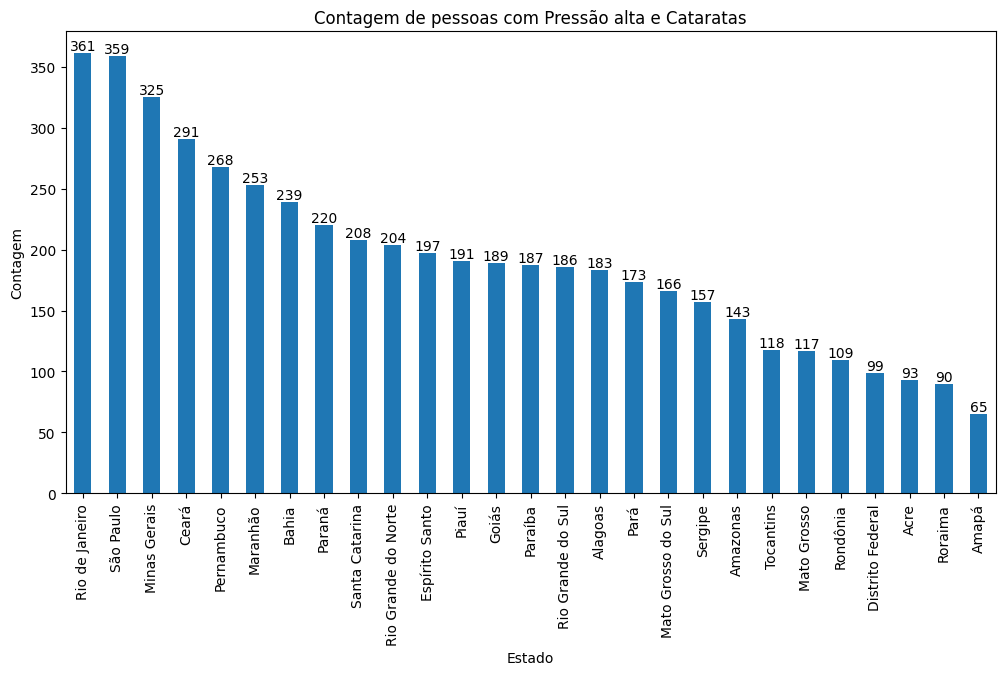

In [10]:
estado_dict = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins',
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia',
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo',
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

df_pa_cataratas['Unidade Federativa'] = df_pa_cataratas['Unidade Federativa'].map(estado_dict)
contagem_por_estado = df_pa_cataratas['Unidade Federativa'].value_counts()

plt.figure(figsize=(12, 6))
ax = contagem_por_estado.plot(kind='bar')

plt.title('Contagem de pessoas com Pressão alta e Cataratas')
plt.xlabel('Estado')
plt.ylabel('Contagem')

# Todo, entender essa parte do código
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

plt.show()

- Não vale a pena fazer por estado, poucas ocorrências em cada estado.
    - Risco de overfitting.
    - Baixa base de testes.
    - Melhor generalizar para todos os estados.
### Descrição da Base - Pressão Alta x Catarata
- 2 == falso, 1 == true.

In [11]:
df_pa_cataratas.describe()

,Cataratas,Pressao Alta,Diabetes,Colesterol Alto,Coracao,AVC,Asma,Artrite,Depressao,Outra doenca mental,Doenca Pulmao,Cancer,Insuficiencia Renal
count,5191.0,5191.0,5169.000000,5152.000000,5191.000000,5191.000000,5191.000000,5191.000000,5191.000000,5191.000000,5191.000000,5191.000000,5191.000000
mean,1.0,1.0,1.703424,1.610248,1.807744,1.908110,1.942015,1.735889,1.863995,1.958197,1.961664,1.920439,1.960316
std,0.0,0.0,0.456792,0.487741,0.394111,0.288898,0.233738,0.440901,0.342826,0.200158,0.192024,0.270638,0.195235
min,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.0,1.0,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,1.0,1.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,1.0,1.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,1.0,1.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


- Das outras colunas quem tem mais relação de frequência com pressão alta e cataratas:
    - Colesterol alto
    - Diabetes

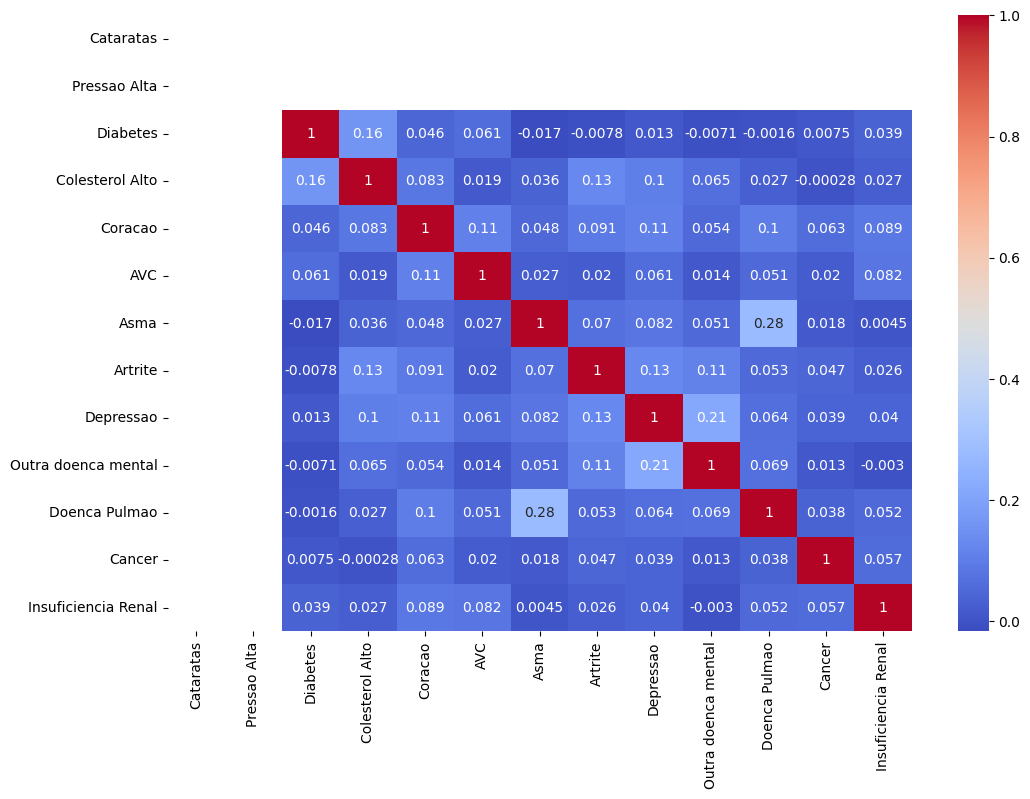

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
# Removendo a coluna 'Unidade Federativa' para calcular a correlação, tipo 'String'
df_heatmap = df_pa_cataratas.copy().drop('Unidade Federativa', axis=1)
sns.heatmap(df_heatmap.corr(), annot=True, cmap='coolwarm')
plt.show()
#TODO: verificar cat e PA

In [13]:
### Análise Exploratória Automatizada

### Abrir no HTML preview
- Deu certo
- Instalar no VSCode

In [14]:
import sweetviz as sv

# Criando o relatório - 1 target feature por vez
report = sv.analyze([df_pa_cataratas, "Data"], target_feat='Pressao Alta')
report.show_html("report.html")

report = sv.analyze([df_pa_cataratas, "Data"], target_feat='Cataratas')
report.show_html("report.html")

                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


                                             |          | [  0%]   00:00 -> (? left)

Couldn't find a suitable web browser!

Set the BROWSER environment variable to your desired browser.



Opening "/home/claudio_augusto/PUC/PUC_3_Semestre/MINERACAO_DADOS/MIN_DADOS_ZARATE_02_2024/report.html" with pgAdmin 4  (text/html)


[182884:182884:0822/102551.594779:ERROR:chrome_browser_cloud_management_controller.cc(162)] Cloud management controller initialization aborted as CBCM is not enabled.
[0822/102551.751866:ERROR:elf_dynamic_array_reader.h(64)] tag not found
[0822/102551.758554:ERROR:file_io_posix.cc(144)] open /sys/devices/system/cpu/cpu0/cpufreq/scaling_cur_freq: No such file or directory (2)
[0822/102551.758585:ERROR:file_io_posix.cc(144)] open /sys/devices/system/cpu/cpu0/cpufreq/scaling_max_freq: No such file or directory (2)
[182884:182972:0822/102551.797724:ERROR:object_proxy.cc(590)] Failed to call method: org.freedesktop.DBus.Properties.Get: object_path= /org/freedesktop/UPower: org.freedesktop.DBus.Error.ServiceUnknown: The name org.freedesktop.UPower was not provided by any .service files
[182884:182972:0822/102551.798071:ERROR:object_proxy.cc(590)] Failed to call method: org.freedesktop.UPower.GetDisplayDevice: object_path= /org/freedesktop/UPower: org.freedesktop.DBus.Error.ServiceUnknown: Th

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [15]:
import pandas_profiling as pp

profile = pp.ProfileReport(df_pa_cataratas, title='Relatório - PNS 2019')
profile.to_file("pandas_profiling.html")

Opening "/home/claudio_augusto/PUC/PUC_3_Semestre/MINERACAO_DADOS/MIN_DADOS_ZARATE_02_2024/report.html" with pgAdmin 4  (text/html)
Opening in existing browser session.


Couldn't find a suitable web browser!

Set the BROWSER environment variable to your desired browser.

/tmp/ipykernel_182271/266292042.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp
/home/claudio_augusto/.local/lib/python3.10/site-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

- Verificar duplicatas, reais ou não? 11%